<a href="https://colab.research.google.com/github/etauchipi/Etauchipi/blob/master/Clasificacion_imagenes_ropa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from matplotlib import image
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import math as mth
import numpy as np

In [ ]:
def normalizar(imagenes, etiquetas):
    imagenes = tf.cast(imagenes, tf.float32)
    imagenes /= 255
    return imagenes, etiquetas

In [ ]:
datos, metadatos = tfds.load('fashion_mnist', as_supervised=True, with_info=True)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteNAECXJ/fashion_mnist-train.tfrecord


  0%|          | 0/60000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteNAECXJ/fashion_mnist-test.tfrecord


  0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
datos_entrenamiento, datos_pruebas = datos['train'], datos['test']

In [ ]:

nombres_clases = metadatos.features['label'].names

In [ ]:
datos_entrenamiento = datos_entrenamiento.map(normalizar)
datos_pruebas = datos_pruebas.map(normalizar)

#agregar losdatos a caché
datos_entrenamiento = datos_entrenamiento.cache()
datos_pruebas = datos_pruebas.cache()

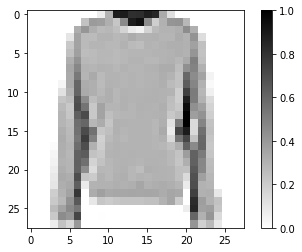

In [ ]:
for imagen, etiqueta in datos_entrenamiento.take(1):
    break

imagen = imagen.numpy().reshape((28, 28))  #Tensores los datos en forma de matriz

#Dibujar la imagen
plt.figure()
plt.imshow(imagen, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

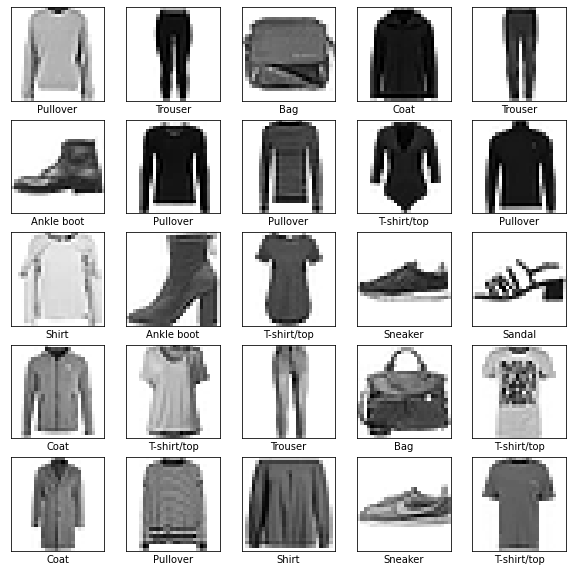

In [ ]:
plt.figure(figsize=(10,10))
for i, (imagen, etiqueta) in enumerate(datos_entrenamiento.take(25)):
    imagen = imagen.numpy().reshape((28, 28))
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(imagen, cmap=plt.cm.binary)
    plt.xlabel(nombres_clases[etiqueta])
    
plt.show()

In [ ]:
# Crear el modelo
modelo = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),   #Blanco y negro
    tf.keras.layers.Dense(50, activation=tf.nn.relu), #
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
                             
#Compilar
modelo.compile(
    optimizer = 'Adam',
    loss = tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy'])

In [ ]:
TAMANO_LOTE = 32
num_entrenamiento = metadatos.splits['train'].num_examples
num_pruebas = metadatos.splits['test'].num_examples


In [ ]:
#Entrenartodo para revisar

datos_entrenamiento = datos_entrenamiento.repeat().shuffle(num_entrenamiento).batch(TAMANO_LOTE)
datos_pruebas = datos_pruebas.batch(TAMANO_LOTE)



In [ ]:
historial = modelo.fit(datos_entrenamiento, epochs=5, steps_per_epoch=mth.ceil(num_entrenamiento /TAMANO_LOTE))

Epoch 1/5
1875/1875 [==============================] - 16s 3ms/step - loss: 0.5091 - accuracy: 0.8179
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3830 - accuracy: 0.8623
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3463 - accuracy: 0.8739
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3289 - accuracy: 0.8793
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3095 - accuracy: 0.8863


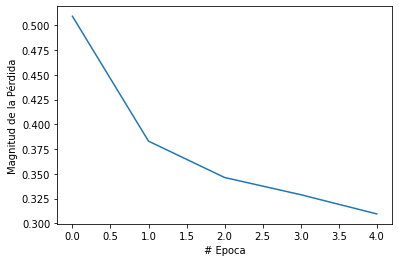

In [ ]:
plt.xlabel("# Epoca")                 
plt.ylabel("Magnitud de la Pérdida")
plt.plot(historial.history['loss'])
plt.show()

In [ ]:
for imagenes_prueba, etiquetas_prueba in datos_pruebas.take(1):
    imagenes_prueba = imagenes_prueba.numpy()
    etiquetas_prueba = etiquetas_prueba.numpy()
    predicciones = modelo.predict(imagenes_prueba)

In [ ]:
def graficar_imagen(i, arr_predicciones, etiquetas_reales, imagenes):
    arr_predicciones, etiqueta_real, img = arr_predicciones[i], etiquetas_reales[i], imagenes[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img[...,0], cmap=plt.cm.binary)
    
    etiqueta_prediccion = np.argmax(arr_predicciones)
    
    if etiqueta_prediccion == etiqueta_real:
        color = 'blue'  #Acierto
    else:
        color = 'red' #Falló
        
    plt.xlabel("{} {:2.0f}% ({})".format(
        nombres_clases[etiqueta_prediccion],
        100 * np.max(arr_predicciones),
        nombres_clases[etiqueta_real],
        color=color))
    

In [ ]:
def graficar_valor_arreglo(i, arr_predicciones, etiqueta_real):
    arr_predicciones, etiqueta_real = arr_predicciones[i], etiqueta_real[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    grafica = plt.bar(range(10), arr_predicciones, color="#777777")
    plt.ylim([0, 1])
    etiqueta_prediccion = np.argmax(arr_predicciones)
    
    grafica[etiqueta_prediccion].set_color('red')
    grafica[etiqueta_real].set_color('blue')

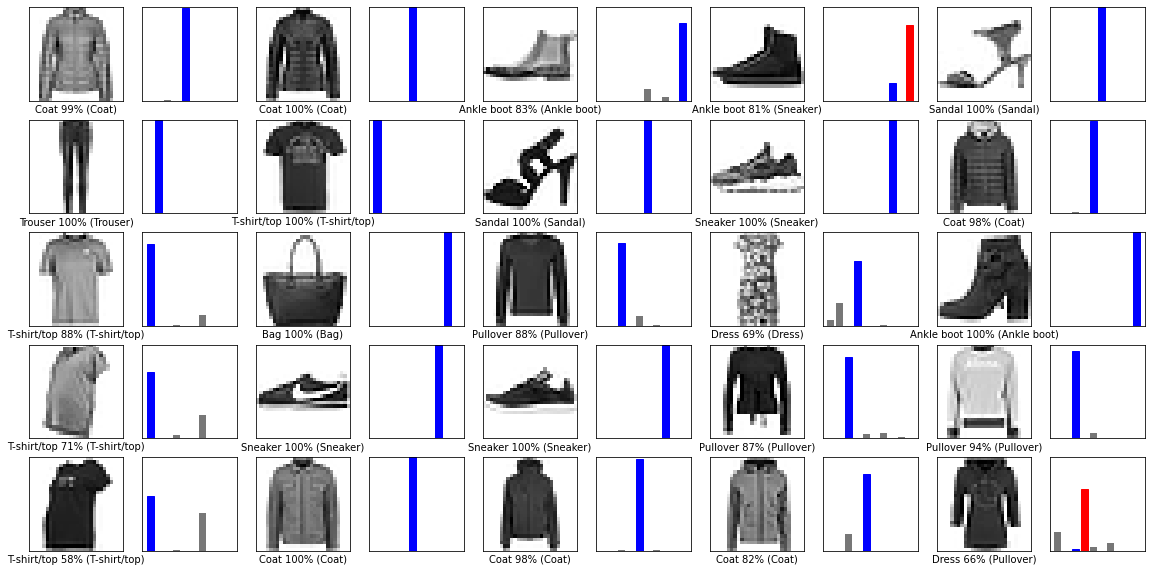

In [ ]:
filas = 5
columnas = 5
num_imagenes = filas * columnas
plt.figure(figsize=(2*2*columnas, 2*filas))
for i in range(num_imagenes):
    plt.subplot(filas, 2*columnas, 2*i+1)
    graficar_imagen(i, predicciones, etiquetas_prueba, imagenes_prueba)
    plt.subplot(filas, 2*columnas, 2*i+2)
    graficar_valor_arreglo(i, predicciones, etiquetas_prueba)

In [ ]:
    imagen = imagenes_prueba[25]
    imagen = np.array([imagen])
    prediccion = modelo.predict(imagen)
    
    print("Predicción: " + nombres_clases[np.argmax(prediccion[0])])

Predicción: Sneaker


In [ ]:
modelo.save('clasificador_imagenes_1.h5')

In [ ]:
#Convertir al archivo h5 a formato de tensor


In [ ]:
pip install tensorflowjs


     |████████████████████████████████| 77 kB 2.8 MB/s 
     |████████████████████████████████| 462 kB 11.1 MB/s 


In [ ]:
#!mkdir tfjs_target_dir

!tensorflowjs_converter --input_format keras clasificador_imagenes_1.h5  /tmp/tfjs_model


Traceback (most recent call last):
  File "/usr/local/bin/tensorflowjs_converter", line 8, in <module>
    sys.exit(pip_main())
  File "/usr/local/lib/python3.7/dist-packages/tensorflowjs/converters/converter.py", line 813, in pip_main
    main([' '.join(sys.argv[1:])])
  File "/usr/local/lib/python3.7/dist-packages/tensorflowjs/converters/converter.py", line 817, in main
    convert(argv[0].split(' '))
  File "/usr/local/lib/python3.7/dist-packages/tensorflowjs/converters/converter.py", line 804, in convert
    weight_shard_size_bytes, metadata_map)
  File "/usr/local/lib/python3.7/dist-packages/tensorflowjs/converters/converter.py", line 501, in _dispatch_converter
    metadata=metadata_map)
  File "/usr/local/lib/python3.7/dist-packages/tensorflowjs/converters/converter.py", line 76, in dispatch_keras_h5_to_tfjs_layers_model_conversion
    raise ValueError('Nonexistent path to HDF5 file: %s' % h5_path)
ValueError: Nonexistent path to HDF5 file: /tmp/tfjs_model/clasificador_imagenes_